    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83


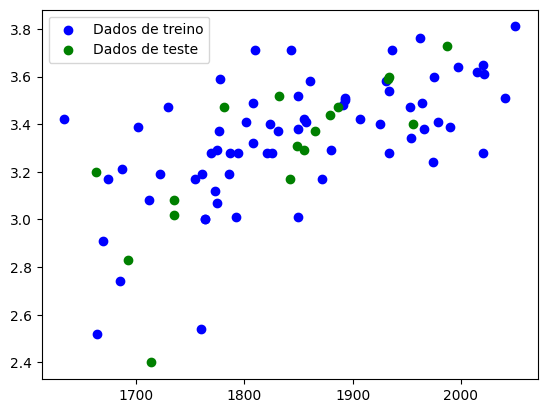

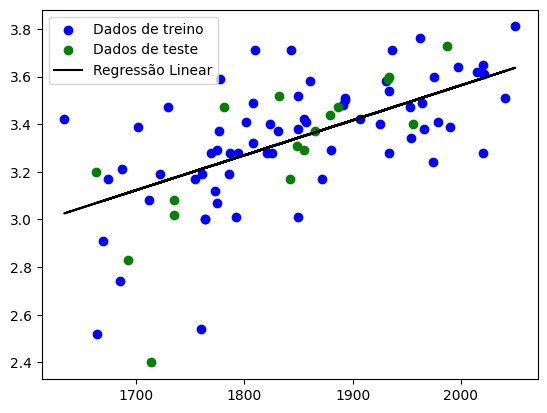

Para Regressão Linear
Nosso [b0]:  [0.62586247]
Nosso [b1]:  [[0.0014687]]
Nossa função gerada foi: Y = 0.6258624722253536 + 0.001468696982641316*X


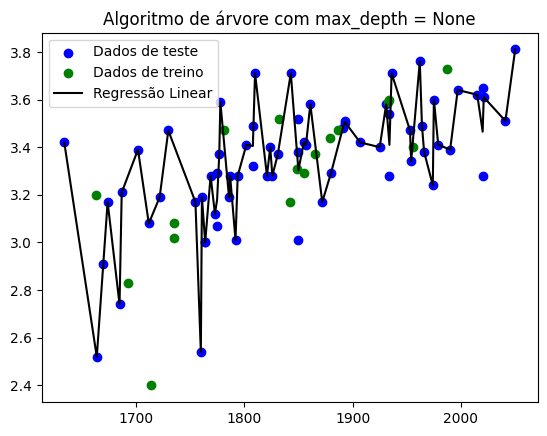

Valor de R2 em dados de treino para max_depth = None: R2 = 0.94
Valor de R2 em dados de teste para max_depth = None: R2 = -0.20


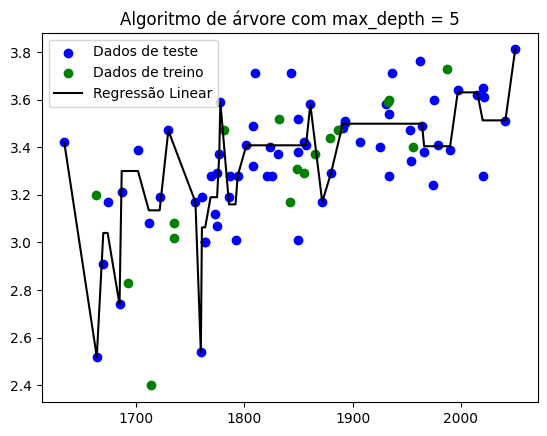

Valor de R2 em dados de treino para max_depth = 5: R2 = 0.79
Valor de R2 em dados de teste para max_depth = 5: R2 = -0.12


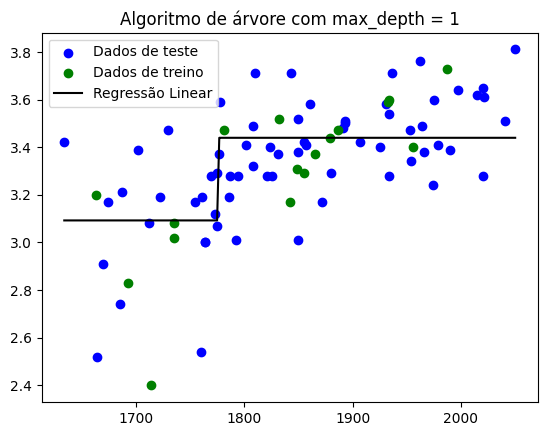

Valor de R2 em dados de treino para max_depth = 1: R2 = 0.37
Valor de R2 em dados de teste para max_depth = 1: R2 = 0.51


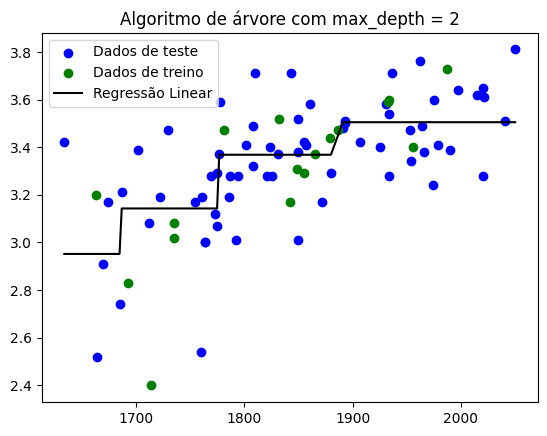

Valor de R2 em dados de treino para max_depth = 2: R2 = 0.45
Valor de R2 em dados de teste para max_depth = 2: R2 = 0.47


Linear Regression
Métricas para dados de teste: 
R2 (treino) - 36.9%
R2 (teste) - 46.9%
Erro médio absoluto - 0.163
Erro médio quadrático - 0.052


Decision Tree
Métricas para dados de teste: 
R2 (treino) - 45.3%
R2 (teste) - 46.7%
Erro médio absoluto - 0.159
Erro médio quadrático - 0.053


Random Forest
Métricas para dados de teste: 
R2 (treino) - 50.0%
R2 (teste) - 47.4%
Erro médio absoluto - 0.165
Erro médio quadrático - 0.052


C:\Users\nia1ct\AppData\Local\Temp\ipykernel_17460\4087164015.py:113: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


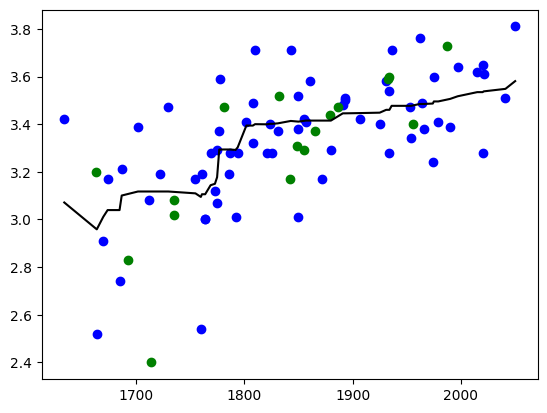

In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

Este é um arquivo de script temporário.
"""

# Importando bibliotecas importantes:

# Para manipulação dos dados
import pandas as pd

# Para utilizar modelo de regressão e dividir os dados em treino e teste
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Para visualização dos dados
import matplotlib.pyplot as plt

# Setando configurações dos gráficos (opcional)
#plt.style.use('ggplot')

# Importando os dados
df = pd.read_csv('3_grade.csv', sep=',')
print(df.head())

# Devemos associar as váriaveis X e y de acordo com suas respectivas colunas
# O .values.reshape(-1,1) garantirá que nossos dados sairão no formato de array
X = df['SAT'].values.reshape(-1,1)
y = df['GPA'].values.reshape(-1,1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando dados
plt.scatter(X_train, y_train, color='blue', label='Dados de treino')
plt.scatter(X_test, y_test, color='green', label='Dados de teste')

# Ajuste da imagem
plt.legend()
plt.show()

# Instanciamos o algoritmo
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_train)

# Visualizando dados
plt.scatter(X_train, y_train, color='blue', label='Dados de treino')
plt.scatter(X_test, y_test, color='green', label='Dados de teste')

# Visualizando linha gerada pela função
plt.plot(X_train, y_pred_lr, color='black', label = 'Regressão Linear')
plt.legend()
plt.show()

# Observando os coeficientes da função
print('Para Regressão Linear')
print('Nosso [b0]: ', linreg.intercept_)
print('Nosso [b1]: ', linreg.coef_)
print('Nossa função gerada foi: Y = {} + {}*X'.format(linreg.intercept_[0], linreg.coef_[0][0]))


# Visualizando dados de treino e teste
#plt.scatter(X_train, y_train, color='blue', label='Dados de teste')
#plt.scatter(X_test, y_test, color='green', label='Dados de treino')
#plt.scatter(X_new, y_new, color='red', label='Pontos novos')
#plt.legend()
#plt.show()

#Algoritmo de árvore
# Aplicando os mesmos conceitos porém utilizando um algoritmo de árvore
# Instanciamos o algoritmo
# Faremos um loop para testar vários valores para max_depth e observar a influencia nos gráficos.
for i in [None, 5, 1, 2]:
    dtr = DecisionTreeRegressor(max_depth=i)# Profundidade máxima é um hyperparâmetro
    #porque nós setamos de forma manual 
    #None você deixa a árvore crescer indefinidademente 
    #Nesta árvore é possível verificar que a árvore abraçou quase todos os pontos com alta
    #variância
    
    # Aplicamos ele nos dados de treino para gerar o modelo
    dtr.fit(X_train, y_train)

    # Predizendo valores baseado no X de treino
    y_pred_dtr = dtr.predict(sorted(X_train))

    # Visualizando dados
    plt.scatter(X_train, y_train, color='blue', label='Dados de teste')
    plt.scatter(X_test, y_test, color='green', label='Dados de treino')

    # Visualizando linha gerada pela função
    plt.plot(sorted(X_train), y_pred_dtr, color='black', label = 'Regressão Linear')

    # Ajuste da imagem
    plt.title('Algoritmo de árvore com max_depth = {}'.format(i)) 
    plt.legend()
    plt.show()
    
    print('Valor de R2 em dados de treino para max_depth = {}: R2 = {:.2f}'.format(i, dtr.score(X_train, y_train)))
    print('Valor de R2 em dados de teste para max_depth = {}: R2 = {:.2f}'.format(i, dtr.score(X_test, y_test)))
    
# Melhor valor de profundidade foi o de 2, vamos plotar para ver o resultado desta árvore.
    
# Instanciamos o algoritmo
rfr = RandomForestRegressor(max_depth=2, random_state=27) # a profundidade padrão é 8

# Aplicamos ele nos dados de treino para gerar o modelo
rfr.fit(X_train, y_train)

# Predizendo valores baseado no X de treino
y_pred_rfr = rfr.predict(sorted(X_train))

plt.scatter(X_train, y_train, color='blue', label='Dados de teste')
plt.scatter(X_test, y_test, color='green', label='Dados de treino')
plt.plot(sorted(X_train), y_pred_rfr, color='black', label = 'Regressão Linear')
# Informações dos modelos

clf = [linreg, dtr, rfr]
nomes = ['Linear Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(clf):
    print('\n')
    print(nomes[i])
    print('Métricas para dados de teste: ')
    print('R2 (treino) - {:.1%}'.format(model.score(X_train, y_train)))
    print('R2 (teste) - {:.1%}'.format(model.score(X_test, y_test)))
    print('Erro médio absoluto - {:.3f}'.format(mean_absolute_error(y_test, model.predict(X_test))))
    print('Erro médio quadrático - {:.3f}'.format(mean_squared_error(y_test, model.predict(X_test))))